<a href="https://colab.research.google.com/github/yy1564440533/Rainfall_prediction/blob/main/%E2%80%9C%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meteorological Data Analysis

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.0 MB/s eta 0:00:00


In [ ]:
pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=d80c6b4db7d497ea1f9c628e722fabb1f17fc51c344f9f02ff1de7db3b2b6a85
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [ ]:
# Import Libraries
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import time
import pickle
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import pmdarima as pm
from filterpy.kalman import KalmanFilter
import statistics

In [ ]:
# Load input csv file with pandas
# Define a function to skip rows
def skip_rows_function(row):
    return row > 8812 or row < 27
Input = pd.read_csv('Climate344.csv', delimiter=',', skiprows=skip_rows_function)

In [ ]:
# Extract data of rainfall
# Hourly rainfall
Rain_hour = Input['Rain [mm/hr]']
# Convert the Series to float
Rain_hour = pd.to_numeric(Rain_hour, errors='coerce')
# Convert the Series to a numpy array
Rain_hour = Rain_hour.tolist()
print(Rain_hour)

# Daily rainfall
Rain_day = []
# Use iteration to sum rains in one day
for i in range(0, len(Rain_hour), 24):
    day = Rain_hour[i:i+24]
    day_total = sum(day)
    Rain_day.append(day_total)
print(Rain_day)

# Weekly rainfall
Rain_week = []
# Use iteration to sum rains in one day
for i in range(0, len(Rain_day), 7):
    week = Rain_day[i:i+7]
    week_total = sum(week)
    Rain_week.append(week_total)
print(Rain_week)

# Monthly rainfall
Rain_month = []
a = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
# Use iteration to sum rains in one day
for i in range(0, 12):
    month = Rain_day[sum(a[:i]):sum(a[:i+1])]
    month_total = sum(month)
    Rain_month.append(month_total)
print(Rain_month)

[0.03, 0.084, 0.143, 0.147, 0.1, 0.184, 0.061, 0.076, 0.083, 0.077, 0.109, 0.094, 0.029, 0.075, 0.096, 0.204, 0.225, 0.123, 0.103, 0.176, 0.243, 0.147, 0.237, 0.23, 0.243, 0.129, 0.086, 0.094, 0.107, 0.133, 0.087, 0.072, 0.065, 0.064, 0.155, 0.184, 0.103, 0.081, 0.104, 0.08, 0.053, 0.038, 0.07, 0.227, 0.157, 0.127, 0.211, 0.043, 0.075, 0.038, 0.007, 0.019, 0.073, 0.064, 0.053, 0.134, 0.11, 0.112, 0.122, 0.138, 0.134, 0.294, 0.346, 0.241, 0.091, 0.053, 0.148, 0.16, 0.053, 0.132, 0.168, 0.134, 0.054, 0.13, 0.127, 0.085, 0.155, 0.238, 0.117, 0.017, 0.053, 0.041, 0.015, 0.034, 0.027, 0.08, 0.043, 0.043, 0.066, 0.077, 0.107, 0.067, 0.096, 0.117, 0.07, 0.043, 0.07, 0.08, 0.076, 0.076, 0.107, 0.117, 0.147, 0.2, 0.227, 0.193, 0.243, 0.266, 0.073, 0.064, 0.107, 0.053, 0.047, 0.05, 0.057, 0.053, 0.09, 0.114, 0.114, 0.1, 0.143, 0.157, 0.09, 0.207, 0.073, 0.046, 0.016, 0.007, 0.023, 0.014, 0.023, 0.064, 0.084, 0.096, 0.15, 0.174, 0.17, 0.219, 0.18, 0.104, 0.134, 0.11, 0.09, 0.061, 0.046, 0.06, 0.1

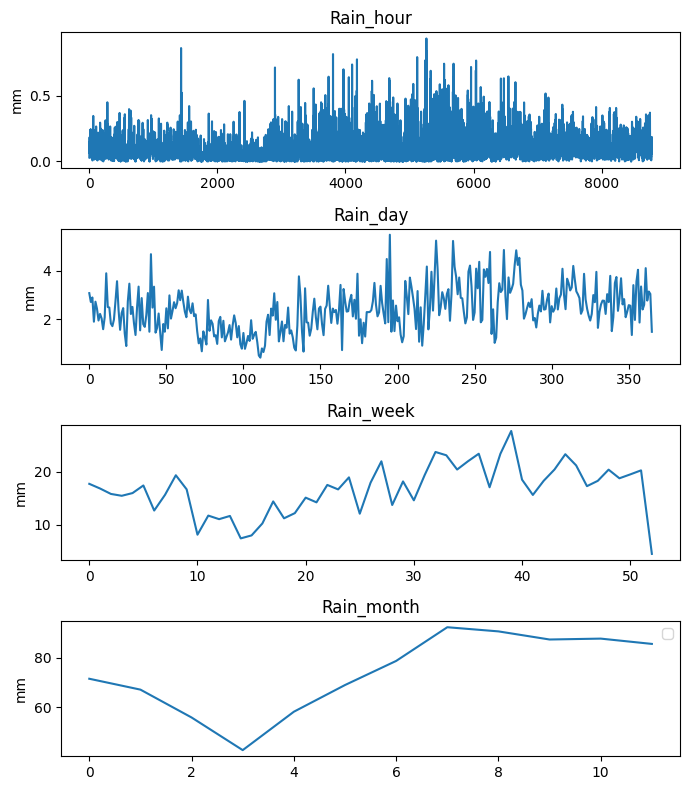

In [ ]:
# Plot rainfall curve
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(7, 8))

# Plot data in each subplot
axes[0].plot(Rain_hour)
axes[0].set_title('Rain_hour')
axes[0].set_ylabel('mm')

axes[1].plot(Rain_day)
axes[1].set_title('Rain_day')
axes[1].set_ylabel('mm')

axes[2].plot(Rain_week)
axes[2].set_title('Rain_week')
axes[2].set_ylabel('mm')

axes[3].plot(Rain_month)
axes[3].set_title('Rain_month')
axes[3].set_ylabel('mm')

# Add space between subplots
plt.tight_layout()
plt.legend();

The ADF test result for hourly data sequence is:
 (-11.195896437521828, 2.3070207223534187e-20, 35, 8748, {'1%': -3.4310977388976402, '5%': -2.861870450905299, '10%': -2.566945894044578}, -18808.80335121098)
The white noise test result for the differenced sequence is: 
        lb_stat  lb_pvalue
1  1974.160894        0.0


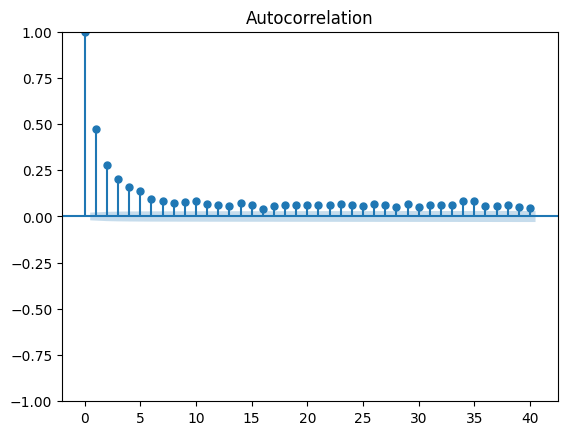

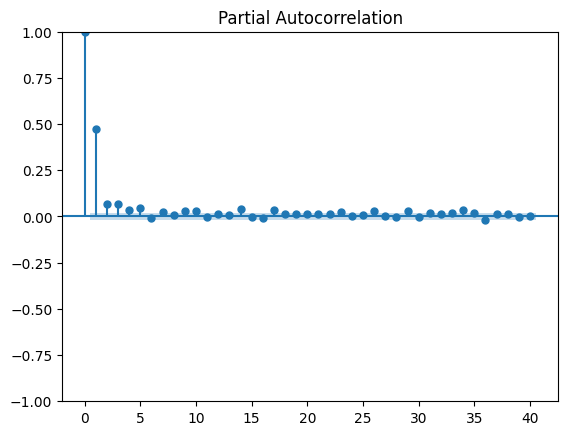

In [ ]:
## Analyse hourly data stationarity
# Autocorrelation and partial autocorrelation plot of hourly data
Rain_hour_series = pd.Series(Rain_hour)
plot_acf(Rain_hour_series).show()
plot_pacf(Rain_hour_series).show()

print(u'The ADF test result for hourly data sequence is:\n', ADF(Rain_hour))
# return values are: adf, pvalue, usedlag, nobs, critical values, icbest, regresults, resstore

# white noise test
print(u'The white noise test result for the differenced sequence is: \n', acorr_ljungbox(Rain_hour, lags=1))

The ADF test result for daily data sequence is:
 (-5.429858697896855, 2.9309044730047495e-06, 3, 362, {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}, 857.9705962568783)
The white noise test result for the differenced sequence is: 
     lb_stat     lb_pvalue
1  61.42799  4.592354e-15


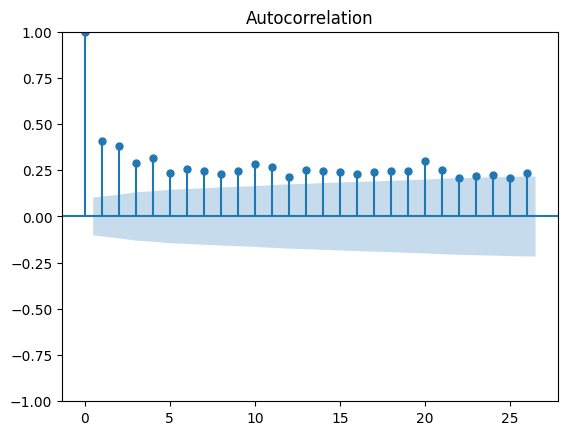

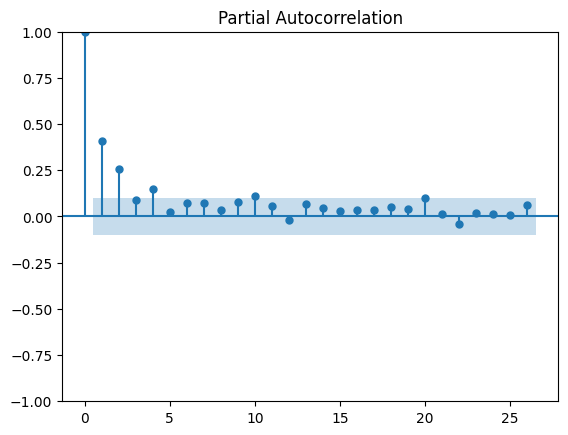

In [ ]:
## Analyse daily data stationarity
# Autocorrelation and partial autocorrelation plot of daily data
Rain_day_series = pd.Series(Rain_day)
plot_acf(Rain_day_series).show()
plot_pacf(Rain_day_series).show()

print(u'The ADF test result for daily data sequence is:\n', ADF(Rain_day))
# return values are: adf, pvalue, usedlag, nobs, critical values, icbest, regresults, resstore

# white noise test
print(u'The white noise test result for the differenced sequence is: \n', acorr_ljungbox(Rain_day, lags=1))

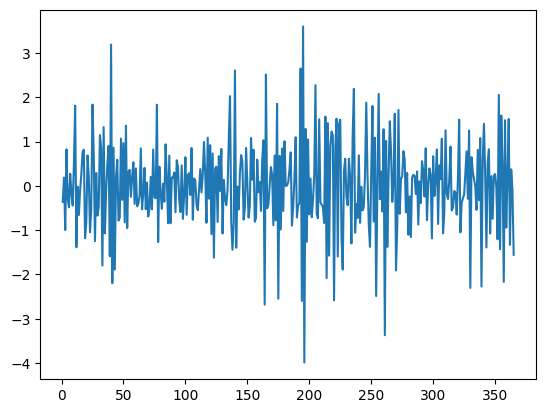

The ADF test result for the differenced daily sequence is:
 (-9.975061933823534, 2.1886674666585674e-17, 9, 355, {'1%': -3.448905534655263, '5%': -2.8697161816205705, '10%': -2.5711258103550882}, 862.2772362223229)
The white noise test result for the differenced daily sequence is:
      lb_stat     lb_pvalue
1  82.442759  1.087751e-19


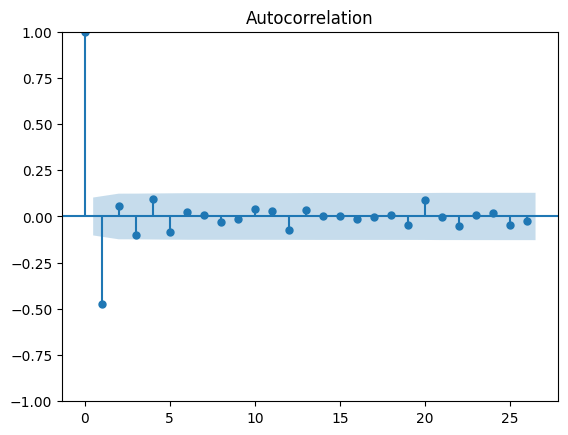

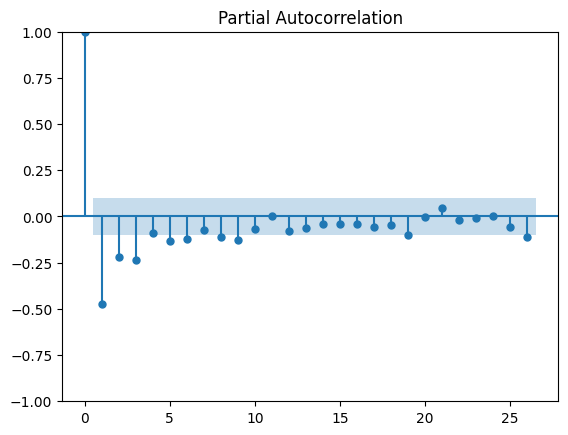

In [ ]:
# The result of the first difference of daily rainfall.
D_data = Rain_day_series.diff().dropna()
# Analyse stationarity of weekly data after first difference
D_data.plot()
plt.show()
plot_acf(D_data).show()
plot_pacf(D_data).show()
print(u'The ADF test result for the differenced daily sequence is:\n', ADF(D_data))
print(u'The white noise test result for the differenced daily sequence is:\n', acorr_ljungbox(D_data, lags=1))


The ADF test result for daily data sequence is:
 (-1.6863981961759273, 0.4381338091702924, 2, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 235.3064849885244)
The white noise test result for the differenced sequence is: 
      lb_stat  lb_pvalue
1  14.923792   0.000112


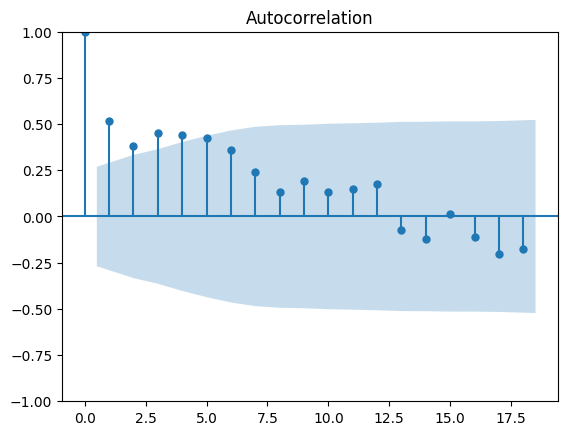

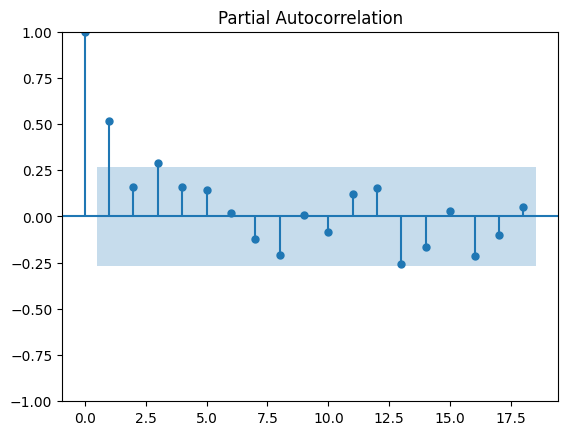

In [ ]:
## Analyse weekly data stationarity
# Autocorrelation and partial autocorrelation plot of weekly data
Rain_week_series = pd.Series(Rain_week)
plot_acf(Rain_week_series).show()
plot_pacf(Rain_week_series).show()

print(u'The ADF test result for daily data sequence is:\n', ADF(Rain_week))
# return values are: adf, pvalue, usedlag, nobs, critical values, icbest, regresults, resstore

# white noise test
print(u'The white noise test result for the differenced sequence is: \n', acorr_ljungbox(Rain_week, lags=1))

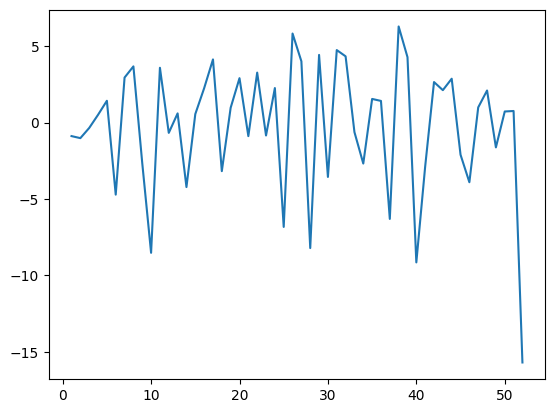

The ADF test result for the differenced weekly sequence is:
 (-1.5703909503710267, 0.498447830378109, 11, 40, {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}, 230.25307240734656)
The white noise test result for the differenced weekly sequence is:
     lb_stat  lb_pvalue
1  2.634546   0.104562


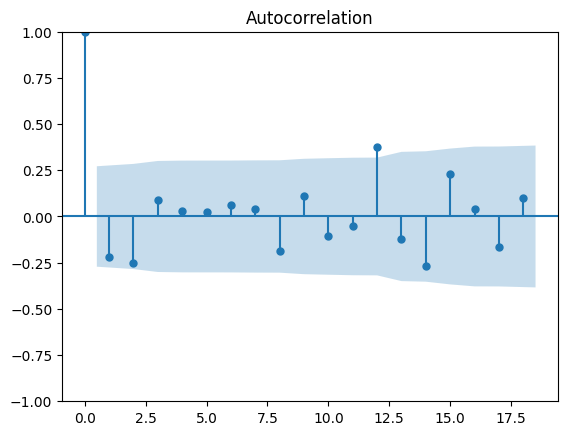

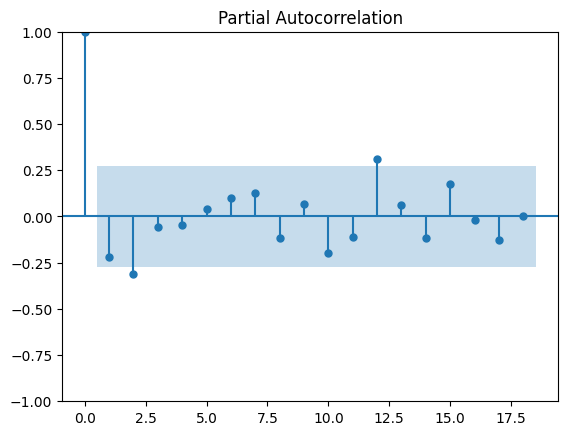

In [ ]:
# The result of the first difference of weekly rainfall.
D_data = Rain_week_series.diff().dropna()
# Analyse stationarity of weekly data after first difference
D_data.plot()
plt.show()
plot_acf(D_data).show()
plot_pacf(D_data).show()
print(u'The ADF test result for the differenced weekly sequence is:\n', ADF(D_data))
print(u'The white noise test result for the differenced weekly sequence is:\n', acorr_ljungbox(D_data, lags=1))


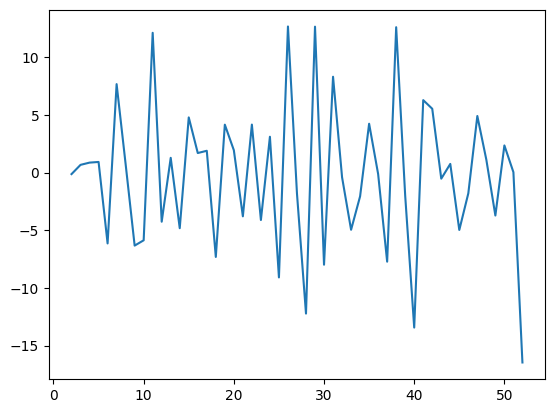

The ADF test result for the second differenced weekly sequence is:
 (-3.31706501640018, 0.014132688461772281, 11, 39, {'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}, 225.41705013435913)
The white noise test result for the second differenced weekly sequence is:
     lb_stat  lb_pvalue
1  9.594074   0.001952


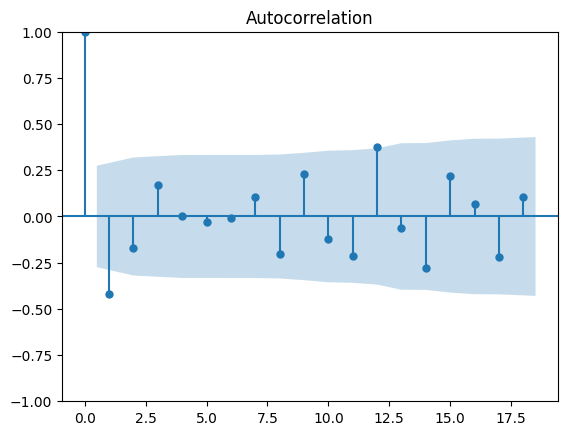

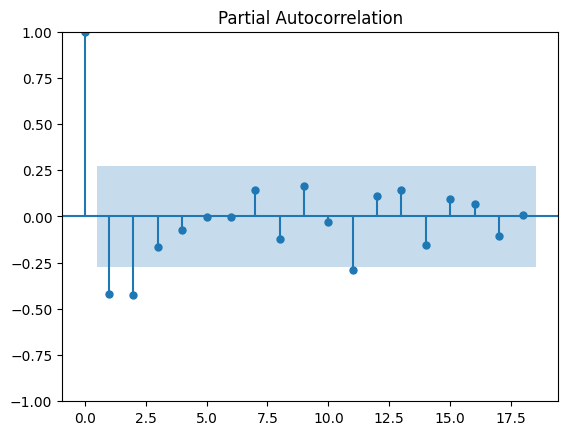

In [ ]:
# The result after second differencing weekly data
D2_data = D_data.diff().dropna()
# Analyse stationarity of weekly data after second difference
D2_data.plot()
plt.show()
plot_acf(D2_data).show()
plot_pacf(D2_data).show()
print(u'The ADF test result for the second differenced weekly sequence is:\n', ADF(D2_data))
print(u'The white noise test result for the second differenced weekly sequence is:\n', acorr_ljungbox(D2_data, lags=1))


In [ ]:
H_variance = statistics.variance(Rain_hour)
D_variance = statistics.variance(Rain_day)
W_test_variance = statistics.variance(Rain_week)
M_variance = statistics.variance(Rain_month)

In [ ]:
# Train and test data split
Test_ratio = 0.2
t = int(10-10*Test_ratio)

H_train = Rain_hour[0:t*len(Rain_hour)//10]
H_test  = Rain_hour[t*len(Rain_hour)//10:]
D_train = Rain_day[0:t*len(Rain_day)//10]
D_test = Rain_day[t*len(Rain_day)//10:]
W_train = Rain_week[0:t*len(Rain_week)//10]
W_test = Rain_week[t*len(Rain_week)//10:]
M_train = Rain_month[0: t*len(Rain_month)//10]
M_test = Rain_month[t*len(Rain_month)//10:]

In [ ]:
# Search for the best order of the ARMA model for hourly data
h_model = pm.auto_arima(H_train,
           start_p = 0, start_q = 0,
           max_p = 3, max_q = 3,
           d = 0,
           m = 1,
           seasonal=False,
           trace=True,error_action='ignore',
           suppress_warnings=True, stepwise=True)

print(h_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-7912.700, Time=0.75 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-13232.707, Time=0.73 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-11019.479, Time=1.68 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-13539.827, Time=3.71 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-13768.851, Time=5.67 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=7.32 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-14522.229, Time=6.46 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-13869.858, Time=1.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=5.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-14329.716, Time=3.90 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=7.36 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-14513.059, Time=11.40 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 55.848 seconds
                               SARIMAX Results                                
Dep. 

In [ ]:
# Determine the order of the ARMA model for daily data using bic method
pmax = 5
qmax = 5
data = D_train
real = D_test
bic_matrix = []
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    model = sm.tsa.ARIMA(data, order=(p,1,q))
    results = model.fit()
    s = results.bic
    bic_matrix.append(s)
# Find the least bic from arma of p and q
bic_matrix = pd.DataFrame(bic_matrix)
bic_matrix = bic_matrix.astype(float)
i,y = bic_matrix.stack().idxmin()
p = i // 6
q = i % 6
print(u'The least BIC of daily prediction model p and q: %s、%s' %(p,q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

The least BIC of daily prediction model p and q: 1、1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Auto search for the best order of the ARMA model for daily data
d_model = pm.auto_arima(D_train,
           start_p = 0, start_q = 0,
           max_p = 5, max_q = 5,
           d = 1,
           m = 1,
           seasonal=False,
           trace=True,error_action='ignore',
           suppress_warnings=True, stepwise=True)

print(d_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=849.210, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=777.977, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=731.651, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=847.213, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=725.184, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=722.669, Time=1.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=769.699, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=723.621, Time=1.75 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=724.480, Time=1.86 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=750.928, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=723.456, Time=2.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=720.821, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=723.275, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=767.710, 

In [ ]:
# Find the order of the ARMA model for daily data with least mse score
pmax = 5
qmax = 5
data = D_train
real = D_test
mse_matrix = []
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    model = sm.tsa.ARIMA(data, order=(p,1,q))
    results = model.fit()
    pred = results.predict(start = len(data), end = len(data)+len(real)-1)
    mse = mean_squared_error(real, pred)
    mse_matrix.append(mse)
# Find the least mse from arma of p and q
mse_matrix = pd.DataFrame(mse_matrix)
mse_matrix = mse_matrix.astype(float)
i,y = mse_matrix.stack().idxmin()
p = i // 6
q = i % 6
print(u'The least MSE of daily prediction model p and q: %s、%s' %(p,q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/st

The least MSE of daily prediction model p and q: 5、3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Determine the order of the ARMA model for weekly data using bic method
pmax = 5
qmax = 5
data = W_train
real = W_test
bic_matrix = []
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    model = sm.tsa.ARIMA(data, order=(p,2,q))
    results = model.fit()
    s = results.bic
    bic_matrix.append(s)
# Find the least bic from arma of p and q
bic_matrix = pd.DataFrame(bic_matrix)
bic_matrix = bic_matrix.astype(float)
i,y = bic_matrix.stack().idxmin()
p = i // 6
q = i % 6
print(u'The least BIC of weekly prediction model p and q: %s、%s' %(p,q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-sta

The least BIC of weekly prediction model p and q: 0、2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Auto search for the best order of the ARMA model for weekly data
w_model = pm.auto_arima(W_train,
           start_p = 0, start_q = 0,
           max_p = 5, max_q = 5,
           d = 2,
           m = 1,
           seasonal=False,
           trace=True,error_action='ignore',
           suppress_warnings=True, stepwise=True)

print(w_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=267.578, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=256.623, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=265.580, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=244.831, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=238.165, Time=0.08 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=234.702, Time=0.08 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=234.427, Time=0.10 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=232.440, Time=0.15 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=232.728, Time=0.13 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=228.787, Time=0.16 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=226.740, Time=0.27 se

In [ ]:
# Find the order of the ARMA model for weekly data with least MSE
pmax = 5
qmax = 5
data = W_train
real = W_test
mse_matrix = []
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    model = sm.tsa.ARIMA(data, order=(p,2,q))
    results = model.fit()
    pred = results.predict(start = len(data), end = len(data)+len(real)-1)
    mse = mean_squared_error(real, pred)
    mse_matrix.append(mse)
# Find the least mse from arma of p and q
mse_matrix = pd.DataFrame(mse_matrix)
mse_matrix = mse_matrix.astype(float)
i,y = mse_matrix.stack().idxmin()
p = i // 6
q = i % 6
print(u'The least MSE of weekly prediction model p and q: %s、%s' %(p,q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conve

The least MSE of weekly prediction model p and q: 0、3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
## Hourly model
data = H_train
real = H_test
model = sm.tsa.ARIMA(data, order=(2,0,1))

# Fit the model
results = model.fit()
s = results.bic
pred = results.predict(start = len(data), end = len(data)+len(real)-1)
mse = mean_squared_error(H_test, pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


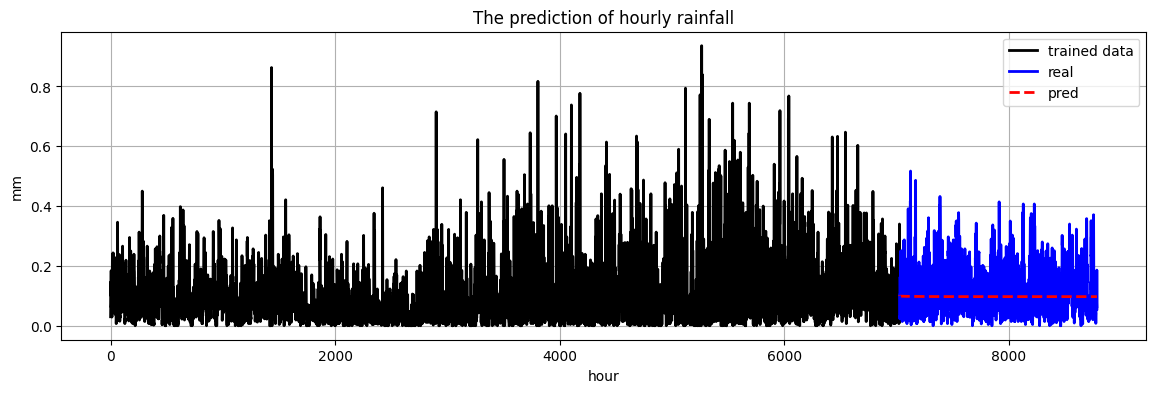

The BIC of hourly rainfall model is:  -14499.998501297754
The MSE of hourly rainfall prediction is:  0.0062935027878281485


In [ ]:
# The trained data
x1 = np.linspace(0, len(data), len(data))
y1 = data
# The predicted data compared with real data
x2 = np.linspace(len(data)+1, len(data)+len(pred), len(pred))
y2 = pred
y3 = real

# Create connection between two sets
x_connect = [x1[-1], x2[0]]
y_connect = [y1[-1], y3[0]]
y2_connect = [y1[-1], y2[0]]
# Plot figure
plt.figure(figsize=(14, 4))
plt.plot(x1, y1, label='trained data', color='black', linestyle='-', linewidth=2)
plt.plot(x2, y3, label='real', color='blue', linestyle='-', linewidth=2)
plt.plot(x2, y2, label='pred', color='red', linestyle='--', linewidth=2)
# Plot connection
plt.plot(x_connect, y_connect, color='blue', linestyle='-', linewidth=2)
plt.plot(x_connect, y2_connect, color='red', linestyle='--', linewidth=2)
# Set title and labels
plt.title('The prediction of hourly rainfall')
plt.xlabel('hour')
plt.ylabel('mm')
plt.legend()
plt.grid(True)

plt.show()
# Print the result of bic and Mse
print(u'The BIC of hourly rainfall model is: ',s)
print(u'The MSE of hourly rainfall prediction is: ',mse)

In [ ]:
## Daily model
data = D_train
real = D_test
model = sm.tsa.ARIMA(data, order=(5,1,3))

# Fit the model
results = model.fit()
s = results.bic
pred = results.predict(start = len(data), end = len(data)+len(real)-1)
mse = mean_squared_error(D_test, pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


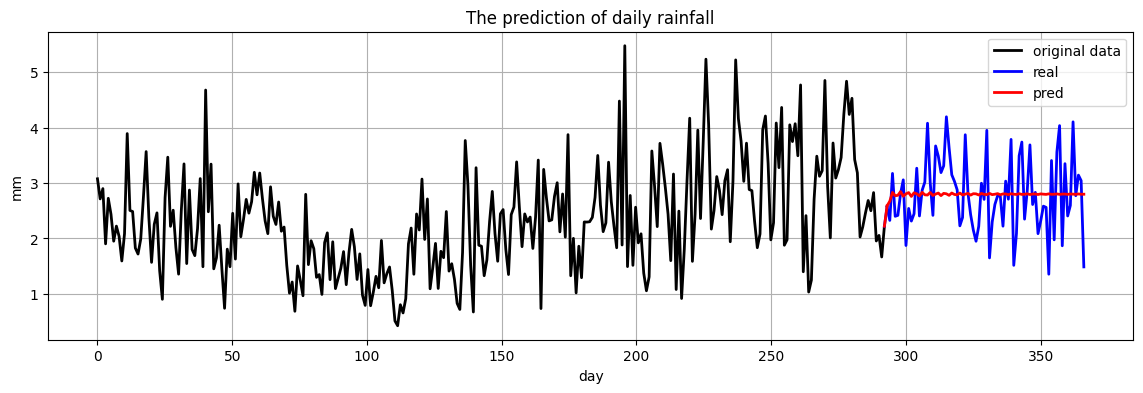

The BIC of daily rainfall model is:  755.5324459086687
The MSE of daily rainfall prediction is:  0.4306679310594234


In [ ]:
# The trained data
x1 = np.linspace(0, len(data), len(data))
y1 = data
# The predicted data compared with real data
x2 = np.linspace(len(data)+1, len(data)+len(pred), len(pred))
y2 = pred
y3 = real

# Create connection between two sets
x_connect = [x1[-1], x2[0]]
y_connect = [y1[-1], y3[0]]
y2_connect = [y1[-1], y2[0]]
# Plot figure
plt.figure(figsize=(14, 4))
plt.plot(x1, y1, label='original data', color='black', linestyle='-', linewidth=2)
plt.plot(x2, y3, label='real', color='blue', linestyle='-', linewidth=2)
plt.plot(x2, y2, label='pred', color='red', linestyle='-', linewidth=2)
# Plot connection
plt.plot(x_connect, y_connect, color='blue', linestyle='-', linewidth=2)
plt.plot(x_connect, y2_connect, color='red', linestyle='-', linewidth=2)
# Set title and labels
plt.title('The prediction of daily rainfall')
plt.xlabel('day')
plt.ylabel('mm')
plt.legend()
plt.grid(True)

plt.show()
# Print the result of bic and Mse
print(u'The BIC of daily rainfall model is: ',s)
print(u'The MSE of daily rainfall prediction is: ',mse)

In [ ]:
## Weekly model
data = W_train
real = W_test
model = sm.tsa.ARIMA(data, order=(0,2,2))

# Fit the model
results = model.fit()
s = results.bic
pred = results.predict(start = len(data), end = len(data)+len(real)-1)
mse = mean_squared_error(W_test, pred)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


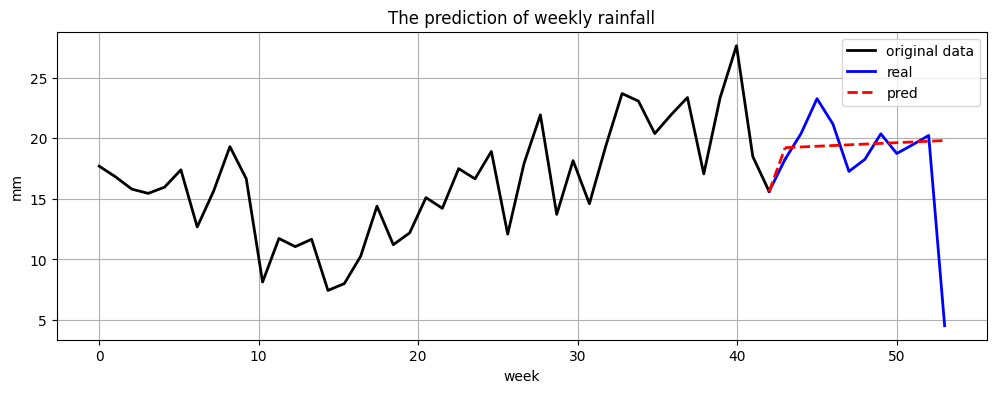

The bic of weekly rainfall model is:  232.2994192540905
The MSE of weekly rainfall prediction is:  23.85222772251067


In [ ]:
# The trained data
x1 = np.linspace(0, len(data), len(data))
y1 = data
# The predicted data compared with real data
x2 = np.linspace(len(data)+1, len(data)+len(pred), len(pred))
y2 = pred
y3 = real

# Create connection between two sets
x_connect = [x1[-1], x2[0]]
y_connect = [y1[-1], y3[0]]
y2_connect = [y1[-1], y2[0]]
# Plot figure
plt.figure(figsize=(12, 4))
plt.plot(x1, y1, label='original data', color='black', linestyle='-', linewidth=2)
plt.plot(x2, y3, label='real', color='blue', linestyle='-', linewidth=2)
plt.plot(x2, y2, label='pred', color='red', linestyle='--', linewidth=2)
# Plot connection
plt.plot(x_connect, y_connect, color='blue', linestyle='-', linewidth=2)
plt.plot(x_connect, y2_connect, color='red', linestyle='--', linewidth=2)
# Set title and labels
plt.title('The prediction of weekly rainfall')
plt.xlabel('week')
plt.ylabel('mm')
plt.legend()
plt.grid(True)

plt.show()
# Print the result of bic and Mse
print(u'The bic of weekly rainfall model is: ',s)
print(u'The MSE of weekly rainfall prediction is: ',mse)

## Method 2 : Kalman Filter

In [ ]:
# Kalman Filter method to predict hourly rainfall

# Convert hourly rainfall data to a 2D numpy array
H_train_array = np.array(H_train)
H_train_array = H_train_array[:, np.newaxis]

H_test_array = np.array(H_test)
H_test_array = H_test_array[:, np.newaxis]

# Define the Kalman filter
kf = KalmanFilter(dim_x=1, dim_z=1)  # One-dimensional state and one-dimensional measurement
kf.x = np.array([H_train_array[0]])  # Initial state estimate
kf.F = np.array([[1.0]])  # State transition matrix
kf.H = np.array([[1.0]])  # Measurement function
kf.P = np.array([[1.0]])  # Initial covariance estimate
kf.R = np.array([[0.1]])  # Measurement noise covariance
kf.Q = np.array([[0.015]])  # Process noise covariance

# Perform the prediction for test period
prediction_period = len(H_test)
predicted_rainfall = []
for i in range(len(H_train) + prediction_period):
    if i < len(H_train):
        measurement = H_train_array[i]
    else:
        measurement = H_test_array[i-len(H_train)]  # For predicting the future values

    kf.predict()
    if measurement is not None:
        kf.update(measurement)
    predicted_rainfall.append(kf.x[0][0] if i >= len(H_train) else kf.x[0])

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


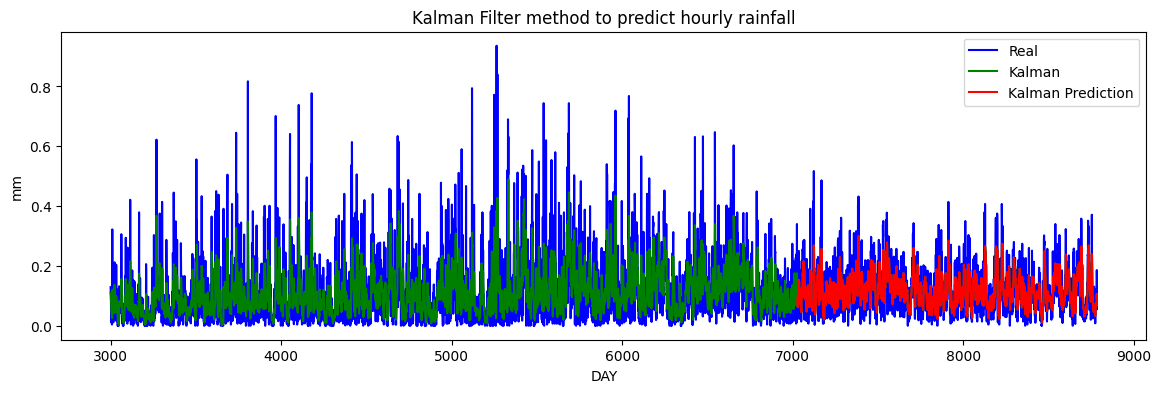

The MSE of hourly rainfall prediction is:  0.0023257883472143316


In [ ]:
# Prediction Evaluation
plt.figure(figsize=(14, 4))
x = np.linspace(3000, len(Rain_hour), len(Rain_hour)-3000)
y1 = Rain_hour[3000:]
y2 = predicted_rainfall[3000:]

# Plot actual and prediction data using kalman
plt.plot(x, y1, label='Real', color='b')
plt.plot(x, y2, label='Kalman', color='g')

# Change the color for prediction
time_to_change_color = len(H_train)-3000
if time_to_change_color < len(x):
    plt.plot(x[time_to_change_color:], y2[time_to_change_color:], label='Kalman Prediction', color='r')

# Add labels and title
plt.xlabel('DAY')
plt.ylabel('mm')
plt.title('Kalman Filter method to predict hourly rainfall')
plt.legend()

# Show the plot
plt.show()

# Print the result of Mse
mse = mean_squared_error(H_test,predicted_rainfall[len(H_train):len(Rain_hour)+1])
print(u'The MSE of hourly rainfall prediction is: ',mse)

In [ ]:
# Kalman Filter method to predict daily rainfall

# Convert Daily rainfall data to a 2D numpy array
D_train_array = np.array(D_train)
D_train_array = D_train_array[:, np.newaxis]

D_test_array = np.array(D_test)
D_test_array = D_test_array[:, np.newaxis]

# Define the Kalman filter
kf = KalmanFilter(dim_x=1, dim_z=1)  # One-dimensional state and one-dimensional measurement
kf.x = np.array([D_train_array[0]])  # Initial state estimate
kf.F = np.array([[1.0]])  # State transition matrix
kf.H = np.array([[1.0]])  # Measurement function
kf.P = np.array([[1.0]])  # Initial covariance estimate
kf.R = np.array([[0.08]])  # Measurement noise covariance
kf.Q = np.array([[0.009]])  # Process noise covariance

# Perform the prediction for test period
prediction_period = len(D_test)
predicted_rainfall = []
for i in range(len(D_train) + prediction_period):
    if i < len(D_train):
        measurement = D_train_array[i]
    else:
        measurement = D_test_array[i-len(D_train)]  # For predicting the future values
        #measurement = None

    kf.predict()
    if measurement is not None:
        kf.update(measurement)
    predicted_rainfall.append(kf.x[0][0] if i >= len(D_train) else kf.x[0])

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


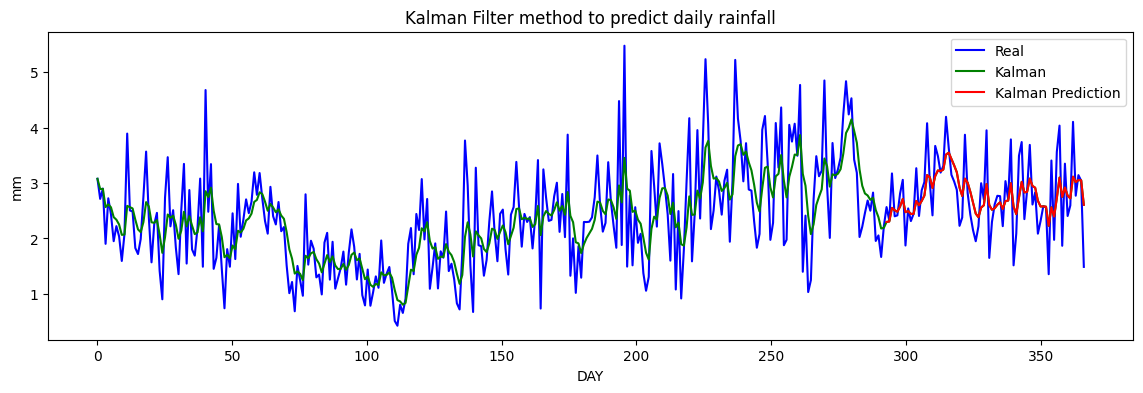

The MSE of daily rainfall prediction is:  0.2547588051067704


In [ ]:
# Prediction Evaluation
plt.figure(figsize=(14, 4))
x = np.linspace(0, len(Rain_day), len(Rain_day))
y1 = Rain_day
y2 = predicted_rainfall

# Plot actual and prediction data using kalman
plt.plot(x, y1, label='Real', color='b')
plt.plot(x, y2, label='Kalman', color='g')

# Change the color for prediction
time_to_change_color = len(D_train)
if time_to_change_color < len(x):
    plt.plot(x[time_to_change_color:], y2[time_to_change_color:], label='Kalman Prediction', color='r')

# Add labels and title
plt.xlabel('DAY')
plt.ylabel('mm')
plt.title('Kalman Filter method to predict daily rainfall')
plt.legend()

# Show the plot
plt.show()

# Print the result of RMse
mse = mean_squared_error(D_test,predicted_rainfall[len(D_train):len(Rain_day)+1])
print(u'The MSE of daily rainfall prediction is: ',mse)

In [ ]:
# Kalman Filter method to predict weekly rainfall

# Convert weekly rainfall data to a 2D numpy array
W_train_array = np.array(W_train)
W_train_array = W_train_array[:, np.newaxis]

W_test_array = np.array(W_test)
W_test_array = W_test_array[:, np.newaxis]

# Define the Kalman filter
kf = KalmanFilter(dim_x=1, dim_z=1)  # One-dimensional state and one-dimensional measurement
kf.x = np.array([W_train_array[0]])  # Initial state estimate
kf.F = np.array([[1.0]])  # State transition matrix
kf.H = np.array([[1.02]])  # Measurement function
kf.P = np.array([[1.02]])  # Initial covariance estimate
kf.R = np.array([[0.1]])  # Measurement noise covariance
kf.Q = np.array([[0.01]])  # Process noise covariance

# Perform the prediction for test period
prediction_period = len(W_test)
predicted_rainfall = []
for i in range(len(W_train) + prediction_period):
    if i < len(W_train):
        measurement = W_train_array[i]
    else:
        measurement = W_test_array[i-len(W_train)]  # For predicting the future values
        #measurement = None

    kf.predict()
    if measurement is not None:
        kf.update(measurement)
    predicted_rainfall.append(kf.x[0][0] if i >= len(D_train) else kf.x[0])

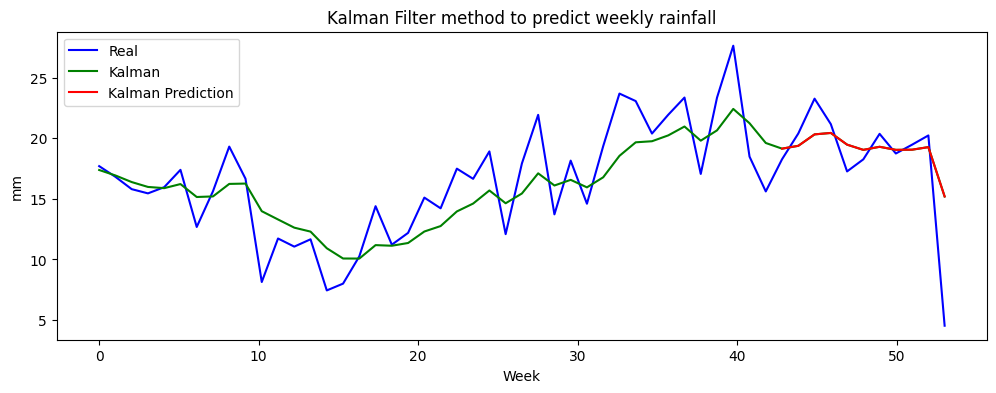

The MSE of weekly rainfall prediction is:  12.05861525243078


In [ ]:
# Weekly Prediction Evaluation
plt.figure(figsize=(12, 4))
x = np.linspace(0, len(Rain_week), len(Rain_week))
y1 = Rain_week
y2 = predicted_rainfall

# Plot actual and prediction data using kalman
plt.plot(x, y1, label='Real', color='b')
plt.plot(x, y2, label='Kalman', color='g')

# Change the color for prediction
time_to_change_color = len(W_train)
if time_to_change_color < len(x):
    plt.plot(x[time_to_change_color:], y2[time_to_change_color:], label='Kalman Prediction', color='r')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('mm')
plt.title('Kalman Filter method to predict weekly rainfall')
plt.legend()

# Show the plot
plt.show()

# Print the result of RMse
mse = mean_squared_error(W_test,predicted_rainfall[len(W_train):len(Rain_week)+1])

print(u'The MSE of weekly rainfall prediction is: ',mse)